In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for scaling          
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# for split train and test
from sklearn.model_selection import train_test_split
# for model building logistic regression
from sklearn.linear_model import LogisticRegression

In [2]:
#TASK1 DATA IMPORTING AND EXPLORTAION
#IMPORT INPUT DATASET FOR THE ANALYSIS
df=pd.read_csv(r'Downloads/DS1_C9_S4_Practice_HR_Data.csv')
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
#OBSERVE SHAPE AND STRUCTURE OF DATASET
df.shape
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#TASK2 DATA EXPLORATIONA ND VISUALIZATION

In [5]:
#A)Determine if the satisfaction level is higher for the employees who are with the company or for those who have left the company.  
satisfaction= df.groupby('left')['satisfaction_level'].mean()
satisfaction

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [6]:
#B)Determine if the average monthly hours is higher for the employees who are working with the company or for those who have left the company.  
monthly_hours=df.groupby('left')['average_monthly_hours'].mean()
monthly_hours

left
0    199.060203
1    207.419210
Name: average_monthly_hours, dtype: float64

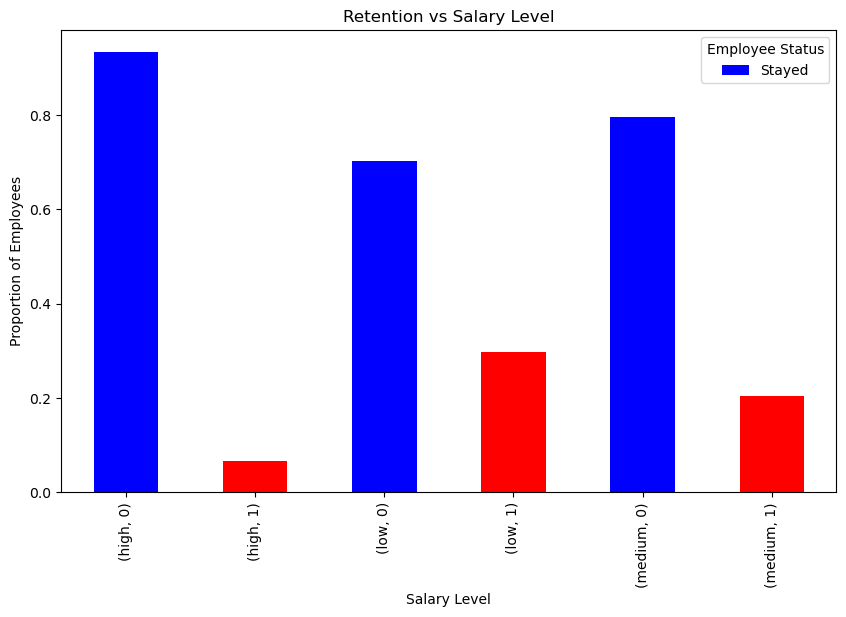

In [7]:
#C)Task c: Relationship between salary and retention
salary_retention = df.groupby('salary')['left'].value_counts(normalize=True)

# Plotting the salary vs retention
salary_retention.plot(kind='bar', stacked=True, figsize=(10, 6), color=['BLUE', 'red'])
plt.title("Retention vs Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees")
plt.legend(['Stayed'], title="Employee Status")
plt.show()

In [8]:
#D)FIND DEPARTMENT WISE RENTATION
dept=df.groupby('Department')['left'].value_counts(normalize=True)
dept

Department   left
IT           0       0.777506
             1       0.222494
RandD        0       0.846252
             1       0.153748
accounting   0       0.734029
             1       0.265971
hr           0       0.709066
             1       0.290934
management   0       0.855556
             1       0.144444
marketing    0       0.763403
             1       0.236597
product_mng  0       0.780488
             1       0.219512
sales        0       0.755072
             1       0.244928
support      0       0.751009
             1       0.248991
technical    0       0.743750
             1       0.256250
Name: proportion, dtype: float64

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
#TASK3:DATA PREPROCESSING

In [11]:
# A) DATA PREPARATION : THE SALARY AND DEPARTMENT CONTAINS TEXT DATA CONVERT TEXT DATA INTO NUMERICAL DATA FOR THE ANALYSIS USING MACHINE LEARNING
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['salary', 'Department'] 
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df[col]

0        7
1        7
2        7
3        7
4        7
        ..
14994    8
14995    8
14996    8
14997    8
14998    8
Name: Department, Length: 14999, dtype: int32

In [12]:
#B)PERFORM MISSING VALUE TREATMENT IF REQUIRED
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [13]:
#C)performing outlier treatment
def outliers(df):
    outlier_data = pd.DataFrame()  # Initialize an empty DataFrame to store all outliers
    for col in df.select_dtypes(include=['number']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        LF = q1 - 1.5 * IQR
        UF = q3 + 1.5 * IQR
        col_outliers = df[(df[col] < LF) | (df[col] > UF)]
        outlier_data = pd.concat([outlier_data, col_outliers])
    outlier_data = outlier_data.drop_duplicates()
    
    return outlier_data
alloutlier = outliers(df)
alloutlier


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,7,2
17,0.78,0.99,4,255,6,0,1,0,7,1
34,0.84,0.87,4,246,6,0,1,0,3,1
47,0.57,0.70,3,273,6,0,1,0,8,1
67,0.90,0.98,4,264,6,0,1,0,6,2
...,...,...,...,...,...,...,...,...,...,...
11890,0.39,0.75,6,185,3,0,0,1,4,0
11892,0.78,0.62,4,150,3,0,0,1,4,0
11893,0.74,0.79,5,121,5,0,0,1,4,0
11894,0.82,0.76,4,266,3,0,0,1,4,0


In [14]:
#D)PERFORMING DATA SCALING
from sklearn.preprocessing import StandardScaler
import pandas as pd
sc= StandardScaler()
scaled_data = sc.fit_transform(df) 
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("Scaled Data:")
print(scaled_df.head())



Scaled Data:
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0           -0.936495        -1.087275       -1.462863              -0.882040   
1            0.752814         0.840707        0.971113               1.220423   
2           -2.022479         0.957554        2.593763               1.420657   
3            0.431041         0.899131        0.971113               0.439508   
4           -0.976716        -1.145699       -1.462863              -0.841993   

   time_spend_company  Work_accident      left  promotion_last_5years  \
0           -0.341235      -0.411165  1.788917              -0.147412   
1            1.713436      -0.411165  1.788917              -0.147412   
2            0.343655      -0.411165  1.788917              -0.147412   
3            1.028546      -0.411165  1.788917              -0.147412   
4           -0.341235      -0.411165  1.788917              -0.147412   

   Department    salary  
0    0.393725 -0.554955  
1    0.39

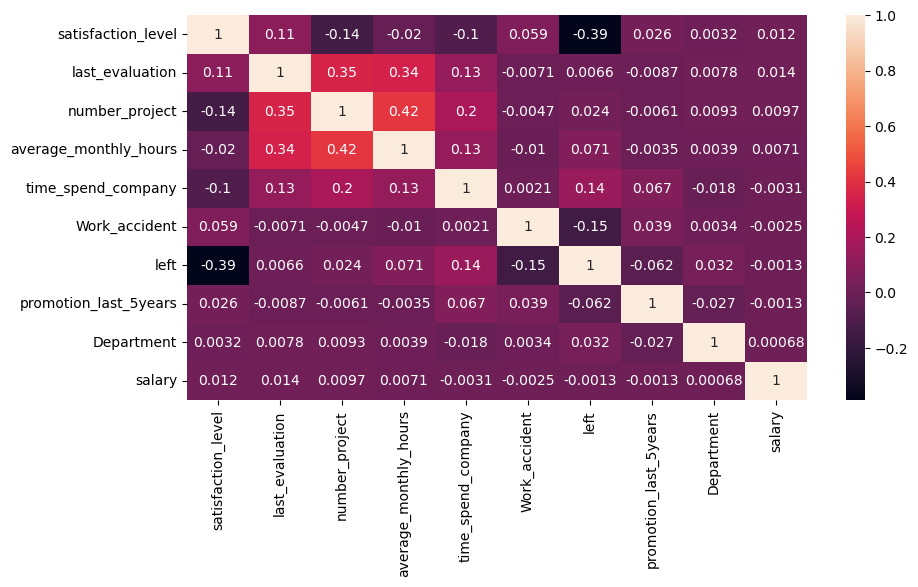

In [15]:
#e) Select features through checking multicollinearity among independent features.
plt.figure(figsize=(10,5))
sns.heatmap(scaled_df.corr(),annot=True,linecolor='blue')
plt.show()

In [16]:
scaled_df.corr()['left'].sort_values()

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary                  -0.001294
last_evaluation          0.006567
number_project           0.023787
Department               0.032105
average_monthly_hours    0.071287
time_spend_company       0.144822
left                     1.000000
Name: left, dtype: float64

In [19]:
#TASK4  MODELING DATA SCALING
X=df.drop(columns=['left'])
Y=df['left']

In [ ]:
#A)SPLIT DATA INTO TRAIN AND TEST
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)
LG=LogisticRegression().fit(x_train,y_train)
x_train

In [21]:
#B)LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)
LG=LogisticRegression().fit(x_train,y_train)
x_train

train_predictions = LG.predict(x_train)
test_predictions = LG.predict(x_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7699780931517287
Test Accuracy: 0.7628888888888888


C:\Users\marur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#TASK5 PERFORMANCE EVALUTION
#A)CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)


Confusion Matrix:
 [[3189  267]
 [ 764  280]]
True Negatives (TN): 3189
False Positives (FP): 267
False Negatives (FN): 764
True Positives (TP): 280


In [25]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

# Assuming y_test and pred are already defined
print("Recall Score:", recall_score(y_test, test_predictions))
print("F1 Score:", f1_score(y_test, test_predictions))
print("Precision Score:", precision_score(y_test, test_predictions))
print("Accuracy Score:", accuracy_score(y_test, test_predictions))

Recall Score: 0.2576853526220615
F1 Score: 0.3481979230299328
Precision Score: 0.536723163841808
Accuracy Score: 0.7628888888888888


In [ ]:
#b) Calculate ROC and AUC score and plot the curves.

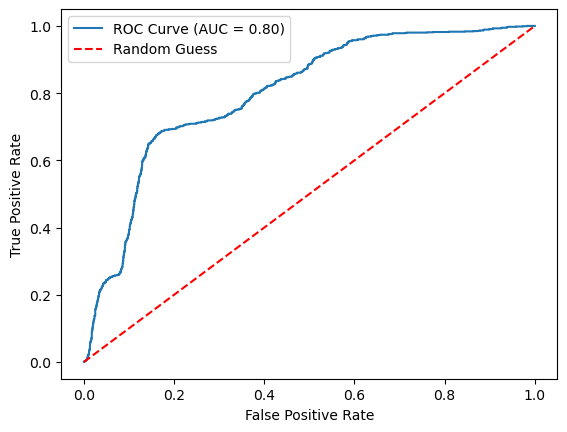

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_val=LG.predict_proba(x_test)
probs=prob_val[:,1]

fpr,tpr,thresholds=roc_curve(y_test,probs)
auc_score = roc_auc_score(y_test,probs)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],color='r',linestyle='--',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
c) Write your interprétation based on evaluation scores.
The model shows moderate performance:
Recall (0.25): The model misses about 25% of the positive cases, which is a concern if catching positives is important.
Precision (0.53): When predicting positives, the model is correct 53% of the time.
F1 Score (0.34): The room for improvement in both recall and precision.
Accuracy (0.76): A high accuracy, but it may be misleading due to potential class imbalance.